# **Multilayer Perceptron**

In [22]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# load the dataset
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [28]:
# Data Preprocessing
# convert Categorical into numeric data
tips=pd.get_dummies(tips,drop_first=True)

# Selection Feature and target columns
X=tips.drop('tip',axis=1)
y=tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Building
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),# input layer

    # Hidden Layer
    tf.keras.layers.Dense(32,activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(1)# here no used activation function due to regression task because this is already in linear
])

# Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=["mae"])

# Train the Model
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

# Evalute the Model
loss=model.evaluate(X_test,y_test,verbose=0)
print("mean square error:",loss[1])


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 12.8115 - mae: 3.3160
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1116 - mae: 2.7087  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0757 - mae: 2.3264 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5373 - mae: 1.9037 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1424 - mae: 1.5384 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8698 - mae: 1.2333 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3803 - mae: 1.1471 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7251 - mae: 0.9798 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5920 - mae: 0.9951 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4557 - mae: 0.9104 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5460 - mae: 0.9192 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2164 - mae: 0.8272  
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1

mean square error: 0.8636474609375


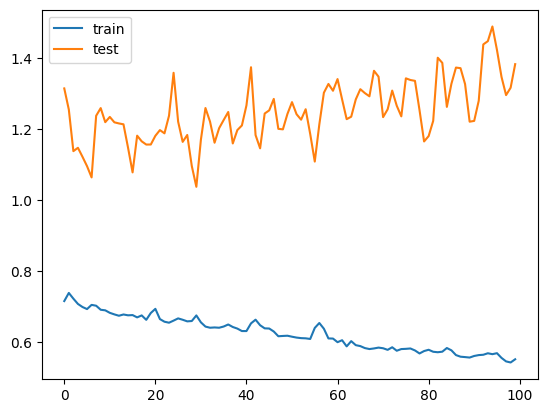

In [29]:
# Plot the training and testing loss
import matplotlib.pyplot as plt
history=model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=0, validation_data=(X_test, y_test))
loss=model.evaluate(X_test,y_test,verbose=0)
print("mean square error:",loss[1])
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [30]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Display the first few predictions
print("Predictions on the test set:")
for i in range(5):
    print(f"Actual tip: {y_test.iloc[i]:.2f}, Predicted tip: {predictions[i][0]:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predictions on the test set:
Actual tip: 3.18, Predicted tip: 3.39
Actual tip: 2.00, Predicted tip: 1.77
Actual tip: 2.00, Predicted tip: 4.04
Actual tip: 5.16, Predicted tip: 2.73
Actual tip: 2.00, Predicted tip: 2.26
